In [3]:
"""
Simon Wang

This project aims to predict 8 possible condition of mices, given 77 genes 
expression measured. This project also explores the significances of specific
genes in determining the conditions of mices.

Data of this project is acquired from
University of California, Irvine's Machine Learning Repository.
https://archive.ics.uci.edu/ml/datasets/Mice+Protein+Expression

"""

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import linear_model, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# load data
df = pd.read_excel(io='https://archive.ics.uci.edu/ml/machine-learning-databases/00342/Data_Cortex_Nuclear.xls', index_col=0)

# pre-process data and take care of missing data
df1 = df.fillna(df.mean())

# prepare testing and training data
y1, y = np.unique(df1['Genotype'], return_inverse=True)
cols = ['Genotype', 'Treatment', 'Behavior', 'class']
xnames = df1[cols]
x = df1.drop(cols, axis=1)
Xtr, Xts, ytr, yts = train_test_split(x, y, test_size=0.3)
xscal = StandardScaler()
Xtr1 = xscal.fit_transform(Xtr)
Xts1 = xscal.transform(Xts)

# build and train regression model
logreg = linear_model.LogisticRegression(C=1e5, solver='liblinear')
logreg.fit(Xtr1, ytr)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
# display accuracy of this model
yhat = logreg.predict(Xts1)
acc = np.mean(yhat == yts)
print('The accuracy of this classifer is ', acc)

The accuracy of this classifer is  0.9567901234567902


<StemContainer object of 3 artists>

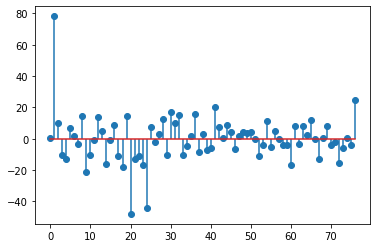

In [5]:
# visualize model coefficiants
W = logreg.coef_
a, b = W.shape
plt.stem(np.arange(b), W.flatten(), use_line_collection=True)

In [6]:
# find out names of genes most likely to be involved in determining
# mice's conditions
i = np.argsort(np.abs(W)*(-1))
print('Names of components for two largest magnitude of W[i] are')
print(df1.columns[i[0][0]])
print(df1.columns[i[0][1]])

Names of components for two largest magnitude of W[i] are
ITSN1_N
BRAF_N
